In [1]:
#Task 1 – Problem Formulation, Data Acquisition and Preparation (12%) 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
names=['Gender', 'Length', 'Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#checking null
data.isnull().any()

Gender            False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [4]:
#### Task 2 – Data Exploration (16%) 

data.describe(include='all')

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.groupby('Gender').size()

Gender
F    1307
I    1342
M    1528
dtype: int64

Text(0.5, 0.98, 'attribute relation')

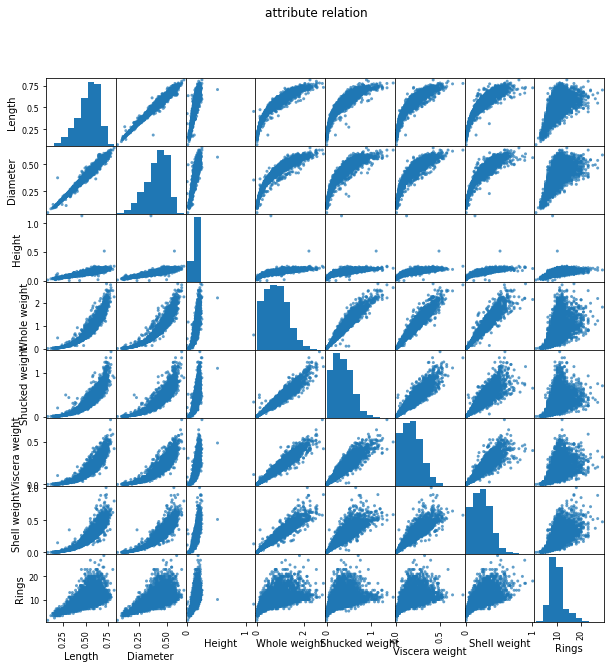

In [7]:
#Q3: How strongly do different attribute relate to each other within and across the three Sex?
pd.plotting.scatter_matrix(data, alpha=0.7, figsize=(10, 10))
plt.suptitle('attribute relation')

F         AxesSubplot(0.1,0.559091;0.363636x0.340909)
I    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
M             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

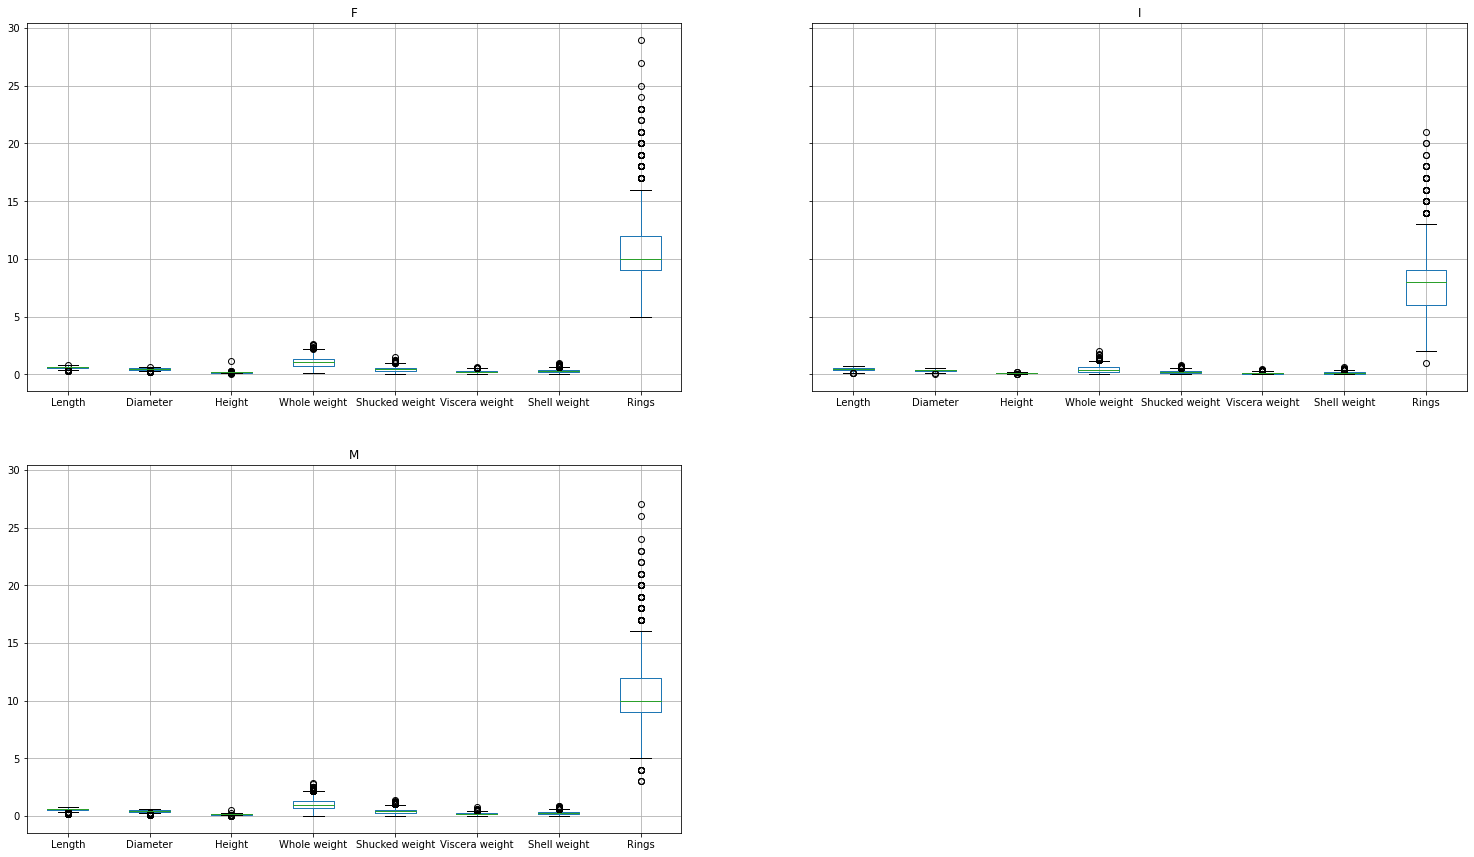

In [8]:
#Q2: How much do the three gender differ from each other in terms of the  length,  diameter, height, Ring size
#  and different weight, respectively?

#two column data
data.groupby(['Gender']).boxplot(figsize = (25,15)) 

<AxesSubplot:>

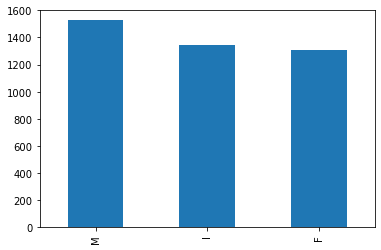

In [9]:
data['Gender'].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'Max of Ring size Based on Gender'}, xlabel='Gender'>

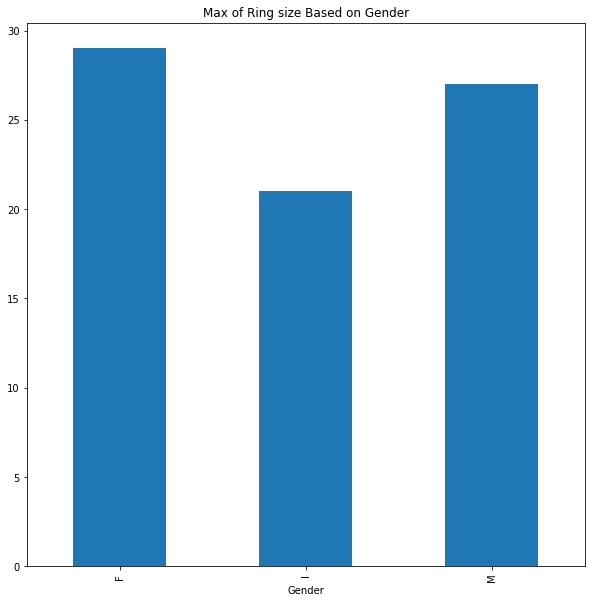

In [10]:
#Which Sex has the maximum Ring size?

ring = data.groupby(['Gender'])['Rings'].max()


ring.plot(kind='bar', title='Max of Ring size Based on Gender', figsize=(10, 10))


<AxesSubplot:title={'center':'Average of Age Based on Gender'}, ylabel='Gender'>

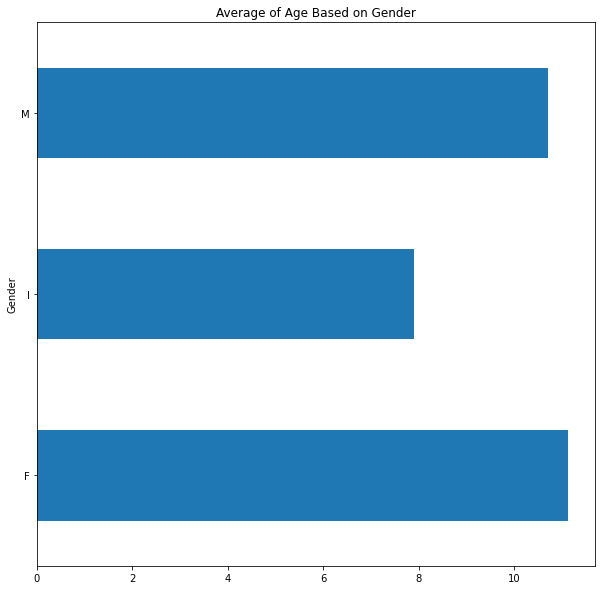

In [11]:
AverageAge = data.groupby(['Gender'])['Rings'].mean()


AverageAge.plot(kind='barh', title='Average of Age Based on Gender', figsize=(10, 10))

<AxesSubplot:title={'center':'Average of Ring size Based on Gender'}, ylabel='Gender'>

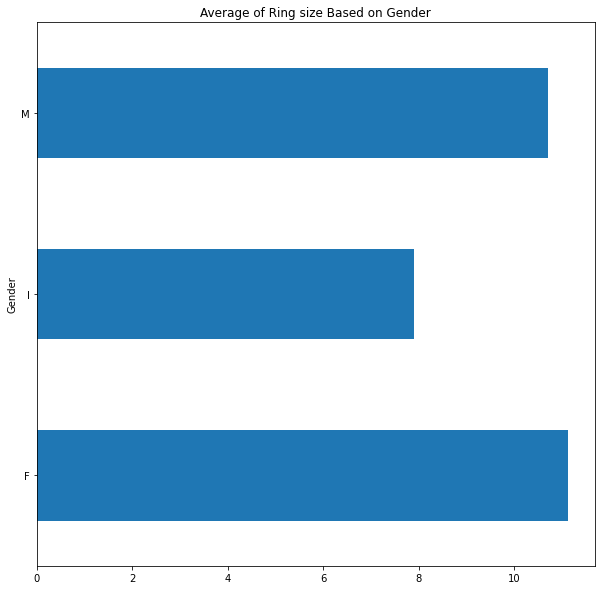

In [12]:
#Average Ring size regarding to the sex?

AverageRing = data.groupby(['Gender'])['Rings'].mean()


AverageRing.plot(kind='barh', title='Average of Ring size Based on Gender', figsize=(10, 10))

C:\Users\SAMEER~1\AppData\Local\Temp/ipykernel_14220/482977778.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AverageWeight = data.groupby(['Gender'])['Whole weight','Shucked weight','Viscera weight','Shell weight'].mean()


<AxesSubplot:title={'center':'Average Weight Based on Gender'}, xlabel='Gender'>

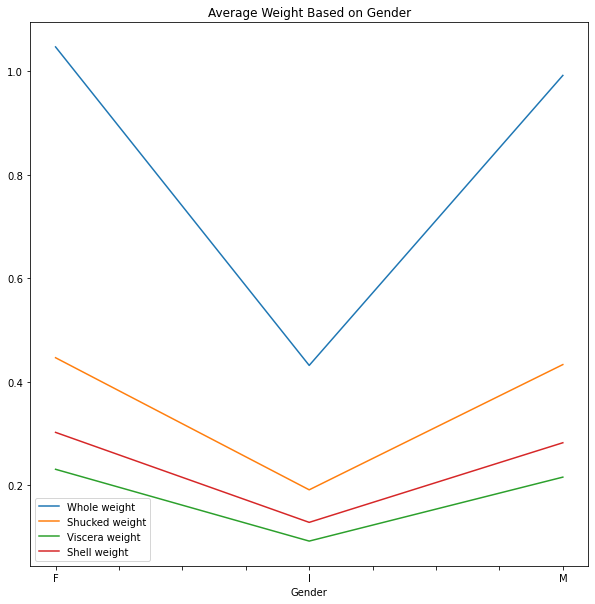

In [13]:
#Average different Weight  regarding to the sex?

AverageWeight = data.groupby(['Gender'])['Whole weight','Shucked weight','Viscera weight','Shell weight'].mean()


AverageWeight.plot(kind='line', title='Average Weight Based on Gender', figsize=(10, 10))

<AxesSubplot:title={'center':'Average Diameter based on Gender'}, xlabel='Gender'>

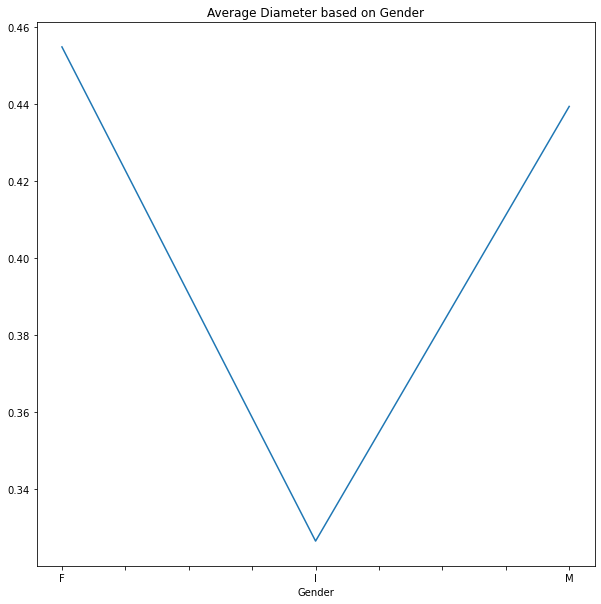

In [14]:
#Average Diameter regarding to the sex?

AverageDia = data.groupby(['Gender'])['Diameter'].mean()

AverageDia.plot(kind='line', title='Average Diameter based on Gender', figsize=(10, 10))

C:\Users\SAMEER~1\AppData\Local\Temp/ipykernel_14220/2532055513.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AverageDia = data.groupby(['Gender'])['Length','Height'].mean()
C:\Users\Sameersatti\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


array([<AxesSubplot:ylabel='Length'>, <AxesSubplot:ylabel='Height'>],
      dtype=object)

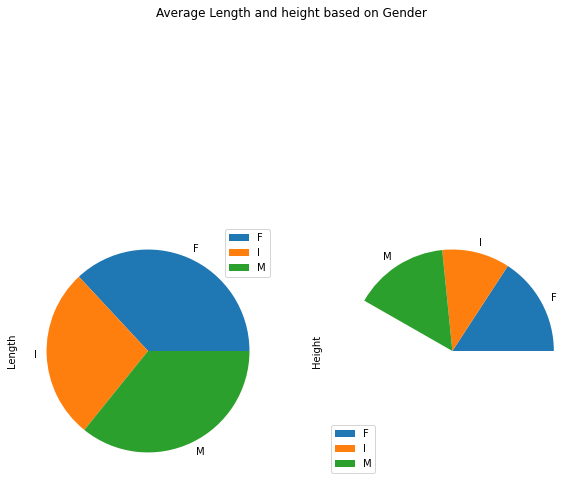

In [15]:
#Average Length and height regarding to the sex?

AverageDia = data.groupby(['Gender'])['Length','Height'].mean()

AverageDia.plot(kind='pie', title='Average Length and height based on Gender', figsize=(10, 10),subplots=True)

<AxesSubplot:title={'center':'Diameter and Ring size link'}, xlabel='Rings', ylabel='Diameter'>

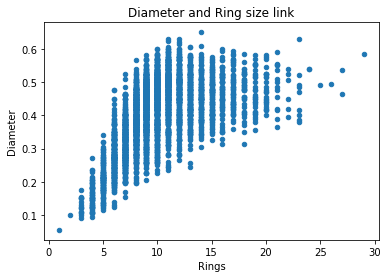

In [16]:
#Does Diameter and Ring size have any linkage?

data.plot(kind='scatter',x='Rings',y='Diameter',title="Diameter and Ring size link")


In [17]:
#Categorical data to numerical data for classification
data['Gender'] = data['Gender'].replace(['F','M','I'],[0,1,2])

In [18]:
feature_names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']

X = data[feature_names]
#Y AS TARGET LABEL
y = data['Gender']

In [19]:
X.shape
#y.shape

(4177, 8)

In [20]:
print(y)

0       1
1       1
2       0
3       1
4       2
       ..
4172    0
4173    1
4174    1
4175    0
4176    1
Name: Gender, Length: 4177, dtype: int64


In [21]:
len(data)

4177

In [22]:
from sklearn.model_selection import train_test_split

#as the length of dataset is not small 30 perc is quite enough for testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)

In [23]:
##Min-Max Normalization re-scales a feature to have the range between 0 and 1.
##for training data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
scale2 = MinMaxScaler(feature_range=(0,1))
scale.fit(X_train)
scale2.fit(X_test)



MinMaxScaler()

In [24]:
m_X_train = scale.transform(X_train)
print(m_X_train)

[[0.75172414 0.79130435 0.15486726 ... 0.40373198 0.38714499 0.34615385]
 [0.37241379 0.34782609 0.07522124 ... 0.06191688 0.04833084 0.15384615]
 [0.4137931  0.3826087  0.0840708  ... 0.09160305 0.06427504 0.23076923]
 ...
 [0.71724138 0.68695652 0.12831858 ... 0.34944869 0.25112108 0.34615385]
 [0.75862069 0.75652174 0.1460177  ... 0.40033927 0.31589437 0.30769231]
 [0.46206897 0.46956522 0.09734513 ... 0.12637829 0.09915296 0.26923077]]


In [25]:
m_X_test = scale.transform(X_test)
#print(m_X_test)
m_X_test.shape

(1254, 8)

<AxesSubplot:title={'center':'After MinMAX'}, ylabel='Density'>

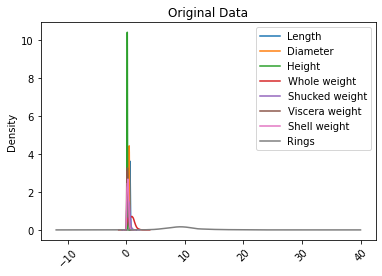

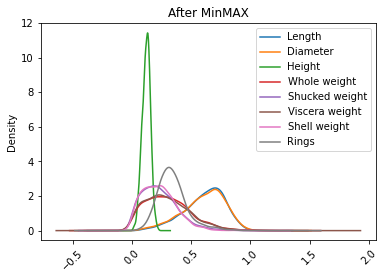

In [26]:
# # original data
pd.DataFrame(X_train, 
              columns = feature_names).plot(kind='kde', legend = True, rot = 45, title = "Original Data")
# after minmax normalisation 
pd.DataFrame(m_X_test, 
             columns = feature_names).plot(kind='kde', legend = True, rot = 45, title = "After MinMAX")


In [27]:

from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(m_X_train, y_train)


DecisionTreeClassifier()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import seaborn as sns
#Generate the confusion matrix
y_pred = dt.predict(m_X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[154 171  61]
 [180 189  76]
 [ 62  87 274]]


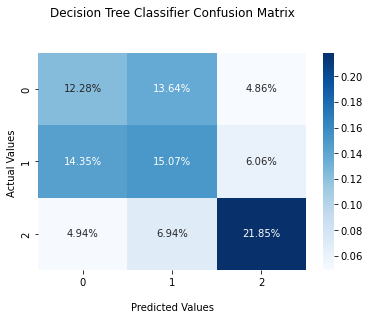

In [29]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

ax.set_title('Decision Tree Classifier Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
print("Recall Score: ", recall_score(y_pred, y_test,average='macro'))
print("Accuracy Score: ",accuracy_score(y_pred, y_test))
print("Precision Score: ",precision_score(y_pred, y_test,average='macro'))
print("F1 Score: ",f1_score(y_pred, y_test,average='macro'))
#print(X_test)

Recall Score:  0.49279144916728806
Accuracy Score:  0.4920255183413078
Precision Score:  0.49047898960312764
F1 Score:  0.4915676830847319


In [31]:

from sklearn.neural_network import MLPClassifier
neural_network_class=MLPClassifier(hidden_layer_sizes=(20,10,20))

#Train the model using the training sets y_pred=clf.predict(X_test)hidden_layer_sizes=(20,10,20)
neural_network_class.fit(m_X_train,y_train)

y_pred_ = neural_network_class.predict(m_X_test)

C:\Users\Sameersatti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
cf_matrix_ = confusion_matrix(y_test, y_pred_)

print(cf_matrix_)

[[ 87 263  36]
 [ 68 307  70]
 [ 12  87 324]]


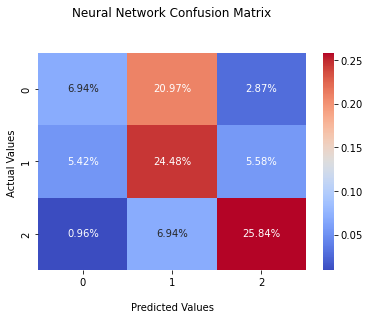

In [33]:
ax1 = sns.heatmap(cf_matrix_/np.sum(cf_matrix_), annot=True,fmt='.2%',cmap='coolwarm')

ax1.set_title('Neural Network Confusion Matrix\n\n');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [34]:
print("Recall Score: ", recall_score(y_pred_, y_test,average='micro'))
print("Accuracy Score: ",accuracy_score(y_pred_, y_test))
print("Precision Score: ",precision_score(y_pred_, y_test,average='micro'))
print("F1 Score: ",f1_score(y_pred_, y_test,average='micro'))

Recall Score:  0.5725677830940988
Accuracy Score:  0.5725677830940988
Precision Score:  0.5725677830940988
F1 Score:  0.5725677830940988


<AxesSubplot:title={'center':'Evaluation metrics visualization'}, xlabel='Model'>

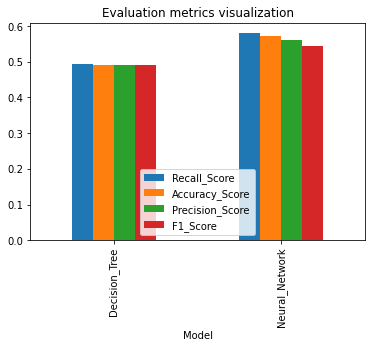

In [35]:
table = {'Model':  ['Decision_Tree','Neural_Network'],
        'Recall_Score': [recall_score(y_pred, y_test,average='macro'),recall_score(y_pred_, y_test,average='macro')],
        'Accuracy_Score': [accuracy_score(y_pred, y_test),accuracy_score(y_pred_, y_test)],
        'Precision_Score':[precision_score(y_pred, y_test,average='macro'),precision_score(y_pred_, y_test,average='macro')],
        'F1_Score':[ f1_score(y_pred, y_test,average='macro'),f1_score(y_pred_, y_test,average='macro')]
        }

df = pd.DataFrame(table)
df.plot.bar(x='Model',title="Evaluation metrics visualization")


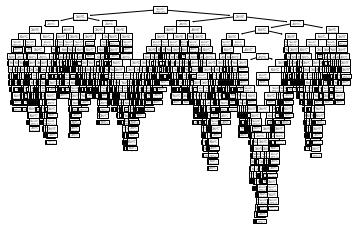

In [36]:
from sklearn import tree

tree.plot_tree(dt);
# fig = plt.figure(figsize=(25,20))
# x = tree.plot_tree(dt, 
#                    feature_names="Gender",  
#                    class_names=Fea,
#                    filled=True)